In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

#CAPTURING THE DATA

In [2]:
df_water = pd.read_csv('water.csv')
df_water.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df_water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#VISUALIZING DATA ON A CARTESIAN PLANE

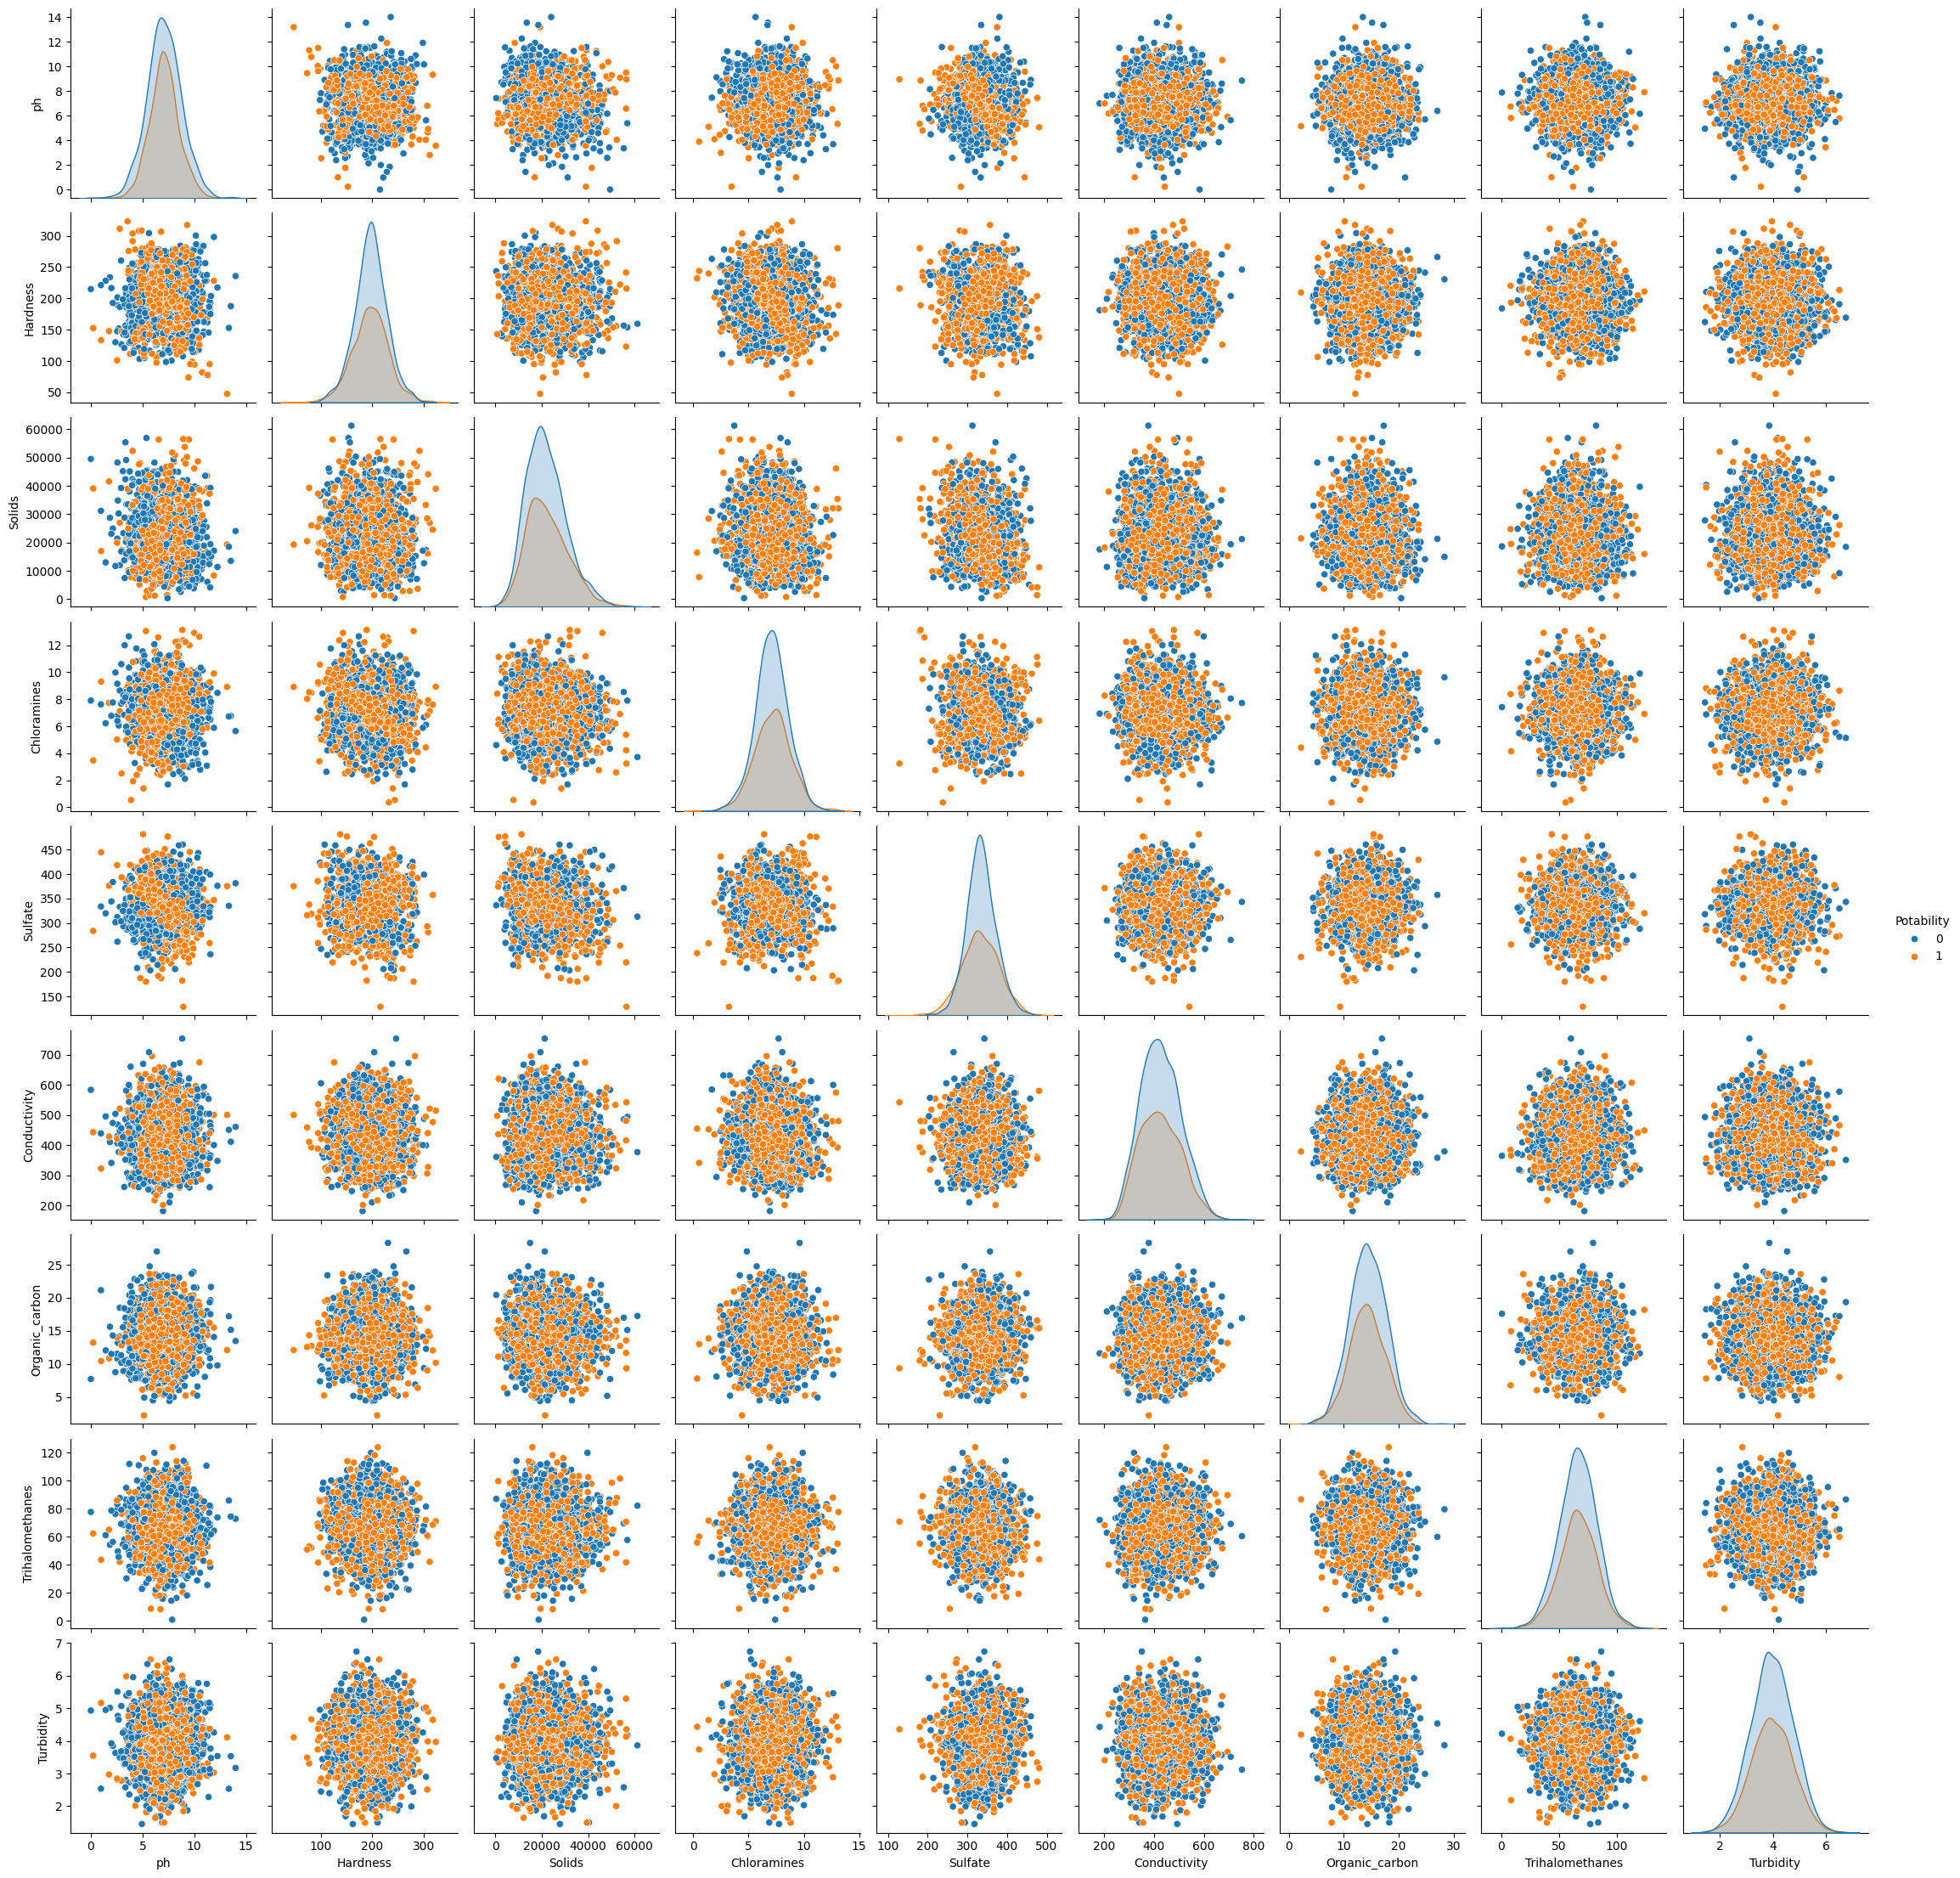

In [7]:
sns.pairplot(df_water, hue = 'Potability')

<Axes: xlabel='Potability', ylabel='count'>

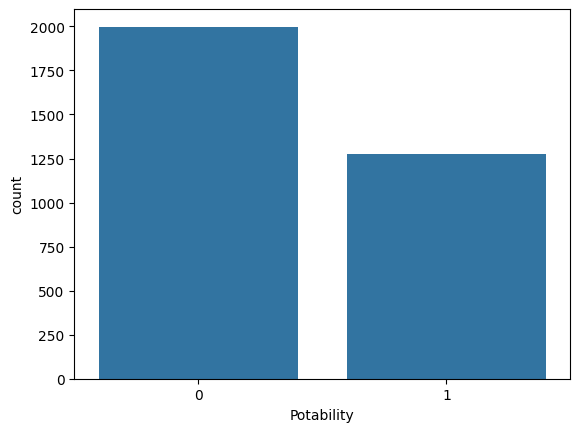

In [8]:
sns.countplot(df_water, x = 'Potability')

#TRANSFORMING DATA ELIMINATING NULL RECORDS

In [9]:
df_water = df_water.dropna(subset=['ph', 'Trihalomethanes','Sulfate'])

In [10]:
df_water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441375     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587065     8.109726   359.330555   
max      14.000000   317.338124  56488.672410    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

#BALANCING THE DATA WITH SMOTE METHOD

In [11]:
X = df_water.drop(columns=['Potability'])
y = df_water['Potability']

In [12]:
smt = SMOTE(random_state = 42)
X,y = smt.fit_resample(X,y)

In [13]:
new_df = pd.concat([X,y], axis=1)
new_df.shape

(2400, 10)

<Axes: xlabel='Potability', ylabel='count'>

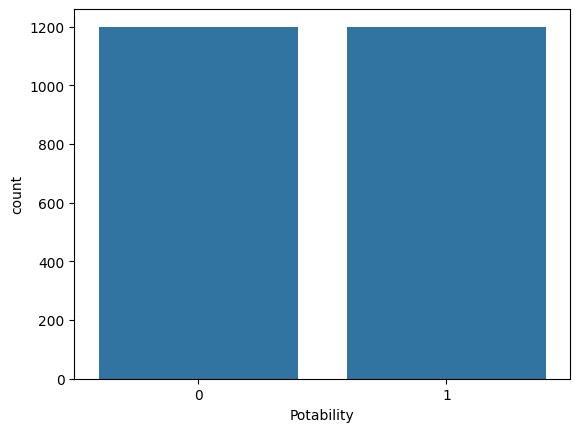

In [14]:
sns.countplot(new_df, x = 'Potability')

#ANALYZING DATA CORRELATION

<Axes: >

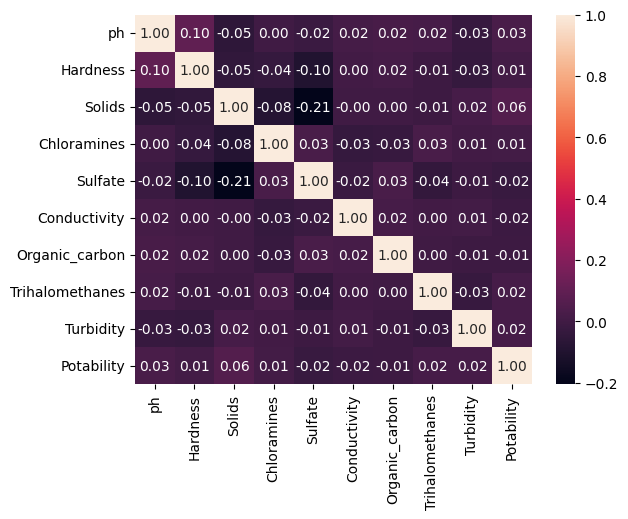

In [15]:
correlation = new_df.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f')